In [1]:
import pandas as pd

df_WorldCupMatches=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupMatches.csv')
df_WorldCupPlayers=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupPlayers.csv')
df_WorldCups=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCups.csv')

In [2]:
# Data Cleaning

# Dropping rows with missing values in critical columns of the WorldCupMatches dataset
world_cup_matches_cleaned = df_WorldCupMatches.dropna(subset=['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals'])

# Dropping rows with missing values in critical columns of the WorldCupPlayers dataset
world_cup_players_cleaned = df_WorldCupPlayers.dropna(subset=['Player Name', 'Team Initials', 'Coach Name'])

# Summary statistics for the WorldCups dataset
summary_stats_world_cups = df_WorldCups.describe(include='all')
df_WorldCups_cleaned=df_WorldCups.copy()
df_WorldCups_cleaned['Attendance']=df_WorldCups['Attendance'].str.replace('.', '', regex=False)
df_WorldCups_cleaned['Attendance'] = df_WorldCups_cleaned['Attendance'].astype(int)

In [3]:
stages_to_keep = ['Final', 'Semi-finals', 'Match for third place', 'Play-off for third place']
df_knock_out_matches_filtered = world_cup_matches_cleaned[world_cup_matches_cleaned['Stage'].isin(stages_to_keep)]

# Calculating the percentage of matches where the half-time leading team wins

In [6]:
def determine_outcome(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Win'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Win'
    else:
        return 'Draw'

def determine_half_time_outcome(row):
    if row['Half-time Home Goals'] > row['Half-time Away Goals']:
        return 'Home Leading'
    elif row['Half-time Home Goals'] < row['Half-time Away Goals']:
        return 'Away Leading'
    else:
        return 'Draw'

# Adding outcome columns
df_knock_out_matches_filtered['Final Outcome'] = df_knock_out_matches_filtered.apply(determine_outcome, axis=1)
df_knock_out_matches_filtered['Half-time Outcome'] = df_knock_out_matches_filtered.apply(determine_half_time_outcome, axis=1)

# Calculate the percentage of matches where the half-time leading team wins
half_time_wins = df_knock_out_matches_filtered[(df_knock_out_matches_filtered['Half-time Outcome'] == 'Home Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Home Win') |
                             (df_knock_out_matches_filtered['Half-time Outcome'] == 'Away Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Away Win')]

percentage_half_time_wins = len(half_time_wins) / len(df_knock_out_matches_filtered) * 100
print(f"Percentage of knock_out matches where the half-time leading team wins: {percentage_half_time_wins:.2f}%")

Percentage of knock_out matches where the half-time leading team wins: 39.73%


C:\Users\91735\AppData\Local\Temp\ipykernel_16412\174648400.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knock_out_matches_filtered['Final Outcome'] = df_knock_out_matches_filtered.apply(determine_outcome, axis=1)
C:\Users\91735\AppData\Local\Temp\ipykernel_16412\174648400.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knock_out_matches_filtered['Half-time Outcome'] = df_knock_out_matches_filtered.apply(determine_half_time_outcome, axis=1)


In [11]:
draw_matches = df_knock_out_matches_filtered[df_knock_out_matches_filtered['Final Outcome'] == 'Draw']


percentage_draw_matches = len(draw_matches) / len(df_knock_out_matches_filtered) * 100
print(f"Percentage of knockout matches that end in a draw (both at half-time and full-time): {percentage_draw_matches:.2f}%")

Percentage of knockout matches that end in a draw (both at half-time and full-time): 10.96%


# Comeback Situations

In [8]:
comebacks = df_knock_out_matches_filtered[(df_knock_out_matches_filtered['Half-time Outcome'] == 'Home Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Away Win') |
                        (df_knock_out_matches_filtered['Half-time Outcome'] == 'Away Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Home Win')]

draw_comebacks = df_knock_out_matches_filtered[(df_knock_out_matches_filtered['Half-time Outcome'] == 'Home Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Draw') |
                             (df_knock_out_matches_filtered['Half-time Outcome'] == 'Away Leading') & (df_knock_out_matches_filtered['Final Outcome'] == 'Draw')]

print(f"Number of comeback wins in Knock-Out Matches: {len(comebacks)}")
print(f"Number of comeback draws in Knock-Out Matches: {len(draw_comebacks)}")

Number of comeback wins in Knock-Out Matches: 3
Number of comeback draws in Knock-Out Matches: 0


# Visualize trends in half-time scores vs. final outcomes across different stages

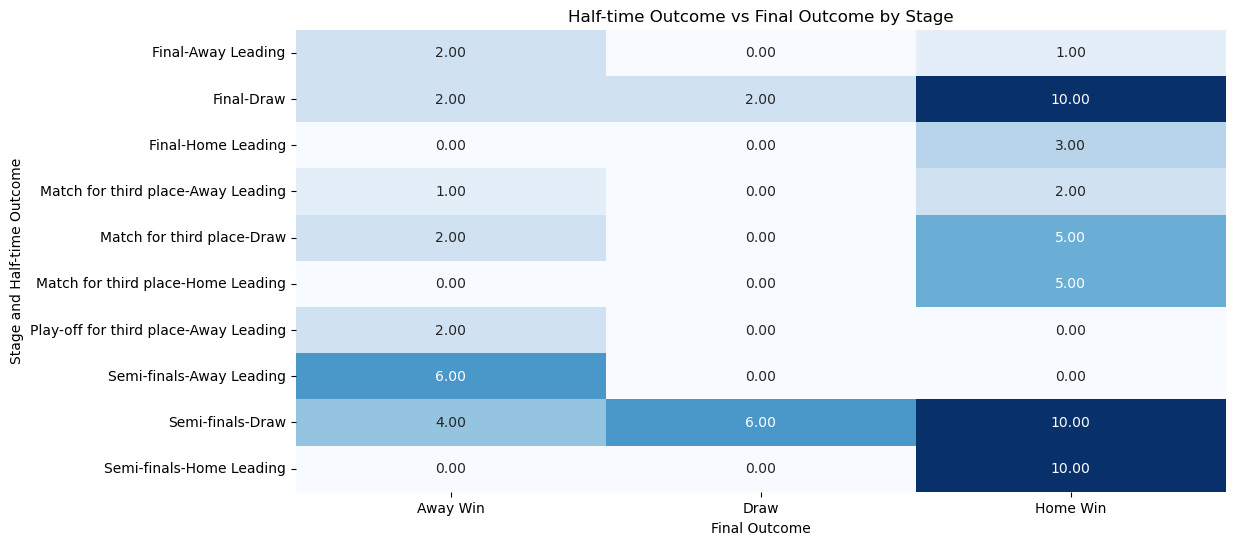

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of half-time leading teams vs final outcomes by stage
half_time_vs_final = df_knock_out_matches_filtered.groupby(['Stage', 'Half-time Outcome', 'Final Outcome']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(half_time_vs_final, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Half-time Outcome vs Final Outcome by Stage')
plt.xlabel('Final Outcome')
plt.ylabel('Stage and Half-time Outcome')
plt.show()

# Top Performing Players in Knockout Matches


### 1. Filter Players with Goals and Count Multiple Goals

In [14]:
# Count the number of 'G' occurrences in the Event column, representing the number of goals scored
# Use na=False to handle NaN values during filtering
players_with_goals = world_cup_players_cleaned[world_cup_players_cleaned['Event'].str.contains('G', na=False)].copy()
players_with_goals['Goals'] = players_with_goals['Event'].apply(lambda x: x.count('G'))

# Merge with knockout matches to get only the goals in knockout stages
knockout_goals = players_with_goals.merge(df_knock_out_matches_filtered[['MatchID', 'Year', 'Stage']],on='MatchID', how='inner')


In [15]:
players_with_goals

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',2
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1
...,...,...,...,...,...,...,...,...,...,...
37619,255955,300186474,GER,LOEW Joachim (GER),S,18,KROOS,NaN,G24' G26',2
37631,255955,300186474,GER,LOEW Joachim (GER),N,9,SCH�RRLE,NaN,I58' G69' G79',2
37701,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17' O70',1
37713,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90',1


In [16]:
knockout_goals

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goals,Year,Stage
0,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Alejandro SCOPELLI,NaN,G56',1,1930.0,Semi-finals
1,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Guillermo STABILE,NaN,G69' G87',2,1930.0,Semi-finals
2,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Luis MONTI,NaN,G20',1,1930.0,Semi-finals
3,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Carlos PEUCELLE,NaN,G80' G85',2,1930.0,Semi-finals
4,202,1088,USA,MILLAR Bob (USA),S,0,Jim BROWN,NaN,G89',1,1930.0,Semi-finals
...,...,...,...,...,...,...,...,...,...,...,...,...
216,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17' O70',1,2014.0,Play-off for third place
217,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90',1,2014.0,Play-off for third place
218,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90',1,2014.0,Play-off for third place
219,255959,300186501,GER,LOEW Joachim (GER),N,19,G�TZE,NaN,I88' G113',1,2014.0,Final


### 2. Count Goals For Each Player

In [17]:
# Sum the goals for each player by year
goals_by_player = knockout_goals.groupby(['Player Name', 'Year'])['Goals'].sum().reset_index()

# Aggregate goals across all years
total_goals_by_player = goals_by_player.groupby('Player Name')['Goals'].sum().reset_index()


In [47]:
goals_by_player.head(10)

,Player Name,Year,Goals
0,A.INIESTA,2010.0,1
1,AMARILDO,1962.0,1
2,Adolf SCHERER,1962.0,1
3,Agne SIMONSSON,1958.0,1
4,Alain COURIOL,1982.0,1
5,Alain GIRESSE,1982.0,1
6,Alejandro SCOPELLI,1930.0,1
7,Alessandro ALTOBELLI,1982.0,1
8,Andreas BREHME,1986.0,1
9,Andreas BREHME,1990.0,1


### 3. Ranks Players

In [45]:
# Rank players by total goals
top_players = total_goals_by_player.sort_values(by='Goals', ascending=False).reset_index(drop=True)
top_players_for_each_year=goals_by_player.sort_values(by='Goals', ascending=False).reset_index(drop=True)
top_players_for_each_year.head(15)

,Player Name,Year,Goals
0,SCH�RRLE,2014.0,8
1,KROOS,2014.0,8
2,PEL� (Edson Arantes do Nascimento),1958.0,5
3,Just FONTAINE,1958.0,5
4,KLOSE,2014.0,4
5,KHEDIRA,2014.0,4
6,M�LLER,2014.0,4
7,Pedro CEA,1930.0,4
8,BLIND,2014.0,4
9,WIJNALDUM,2014.0,4


In [26]:
top_players_for_each_year['Player_Year']=top_players_for_each_year['Player Name'] + ' (' + top_players_for_each_year['Year'].astype(str) + ')'

### 4. Analyze by Stage

In [20]:
# Sum goals by player and stage
goals_by_player_stage = knockout_goals.groupby(['Player Name', 'Stage'])['Goals'].sum().reset_index()

# Pivot the data to better visualize goals by stages
goals_by_player_stage_pivot = goals_by_player_stage.pivot(index='Player Name', columns='Stage', values='Goals').fillna(0)


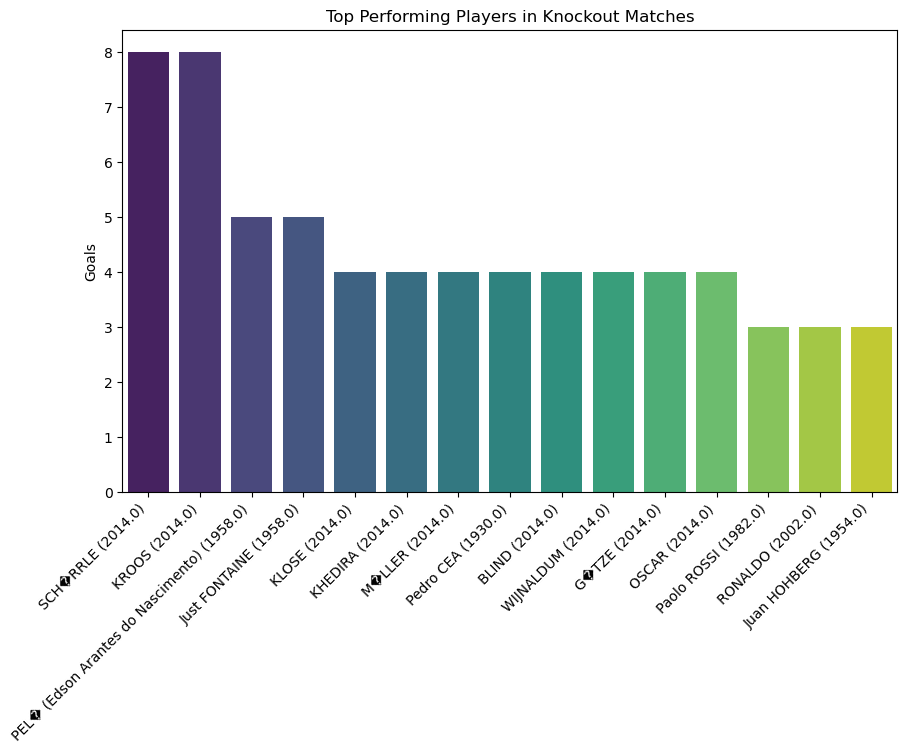

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing top players
plt.figure(figsize=(10, 6))
top_players_plot = top_players_for_each_year.head(15)  # Adjust the number of players as needed
sns.barplot(x='Player_Year', y='Goals', data=top_players_plot, hue='Player_Year', palette='viridis')
plt.title('Top Performing Players in Knockout Matches')
plt.xlabel('')
plt.ylabel('Goals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




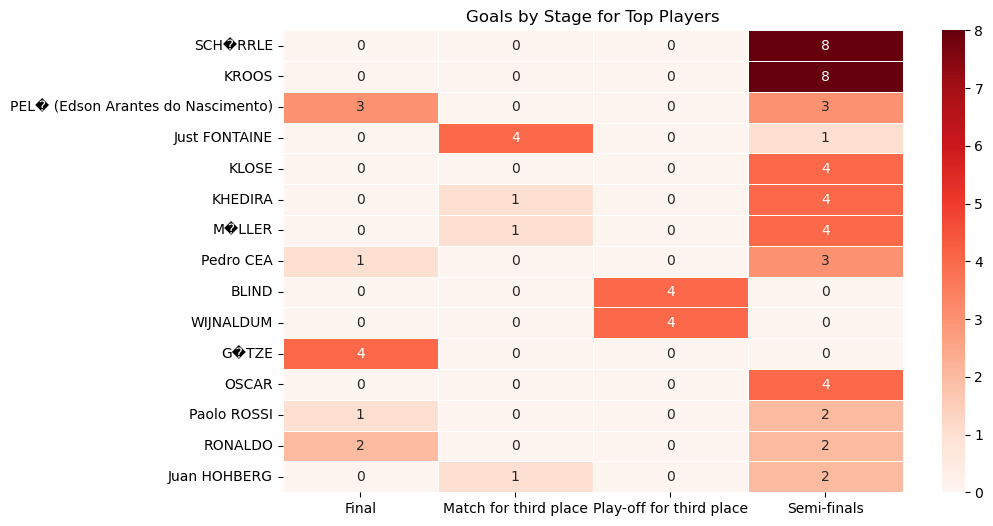

In [44]:
# Visualizing goals by stage for top players
# Ensure that 'Player Name' in top_players_plot matches index in goals_by_player_stage_pivot
top_players_names = top_players_plot['Player Name'].tolist()
goals_by_player_stage_filtered = goals_by_player_stage_pivot.loc[top_players_names]

plt.figure(figsize=(10, 6))
sns.heatmap(goals_by_player_stage_filtered, annot=True, cmap='Reds', linewidths=0.5)
plt.title('Goals by Stage for Top Players')
plt.xlabel('')
plt.ylabel('')
plt.show()